# Infomap
Multi-level network clustering based on the [Map equation](http://www.mapequation.org/publications.html#Rosvall-Axelsson-Bergstrom-2009-Map-equation).


### The Map Equation

\begin{equation*}
    L(M) = q_\curvearrowright H(\mathcal{Q}) + \sum_{i = 1}^{m}{p_{\circlearrowright}^i H(\mathcal{P}^i)}
\end{equation*}

$L(M)$ measures the amount of information it takes to describe a random walk on a network given a partition of the network into modules $M$. It is a sum of the amount of information needed to describe the movements _between_ and _within_ the modules, which balances the goodness of fit with the complexity of the model. For more information, see [www.mapequation.org](http://www.mapequation.org).

### Import Infomap
Infomap includes an `examples/python` folder with some examples, including this notebook. Run `make` in that directory to build the python interface to a local folder.

The `infomap` package exposes two classes, `Infomap` and `MemInfomap`, that wraps an input `network`, an output `tree`, and a `run` method to run Infomap on the input network. The classes takes a string of [options](http://www.mapequation.org/code.html#Options) as input.

In [1]:
import infomap
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [21]:
def findCommunities(G):
    """
    Partition network with the Infomap algorithm.
    Annotates nodes with 'community' id and return number of communities found.
    """

    infomapWrapper = infomap.Infomap("--two-level --silent")
    network = infomapWrapper.network()

    print("Building Infomap network from a NetworkX graph...")
    for e in G.edges(data=True):
        network.addLink(e[0],e[1],e[2]['weight'])

    print("Find communities with Infomap...")
    infomapWrapper.run();

    #tree = network.tree

    # print("Found %d modules with codelength: %f" % (tree.numTopModules(), tree.codelength()))

    print("Found {} modules with codelength: {}".format(infomapWrapper.numTopModules(), infomapWrapper.codelength()))

    print("Result")
    print("\n#node module")
 
    communities = {}
    for node in infomapWrapper.iterTree():
        if node.isLeaf():
            print("{} {}".format(node.physicalId, node.moduleIndex()))
    
        communities[node.physicalId] = node.moduleIndex()

    nx.set_node_attributes(G, name='community', values=communities)
    return G

In [5]:
def drawNetwork(G):
    # position map
    pos = nx.spring_layout(G)
    # community ids
    communities = [v for k,v in nx.get_node_attributes(G, 'community').items()]
    numCommunities = max(communities) + 1
    # color map from http://colorbrewer2.org/
    cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
    cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Draw nodes
    nodeCollection = nx.draw_networkx_nodes(G,
        pos = pos,
        node_color = communities,
        cmap = cmapLight
    )
    # Set node border color to the darker shade
    darkColors = [cmapDark(v) for v in communities]
    nodeCollection.set_edgecolor(darkColors)

    # Draw node labels
    for n in G.nodes():
        plt.annotate(n,
            xy = pos[n],
            textcoords = 'offset points',
            horizontalalignment = 'center',
            verticalalignment = 'center',
            xytext = [0, 0],
            color = cmapDark(communities[n])
        )

    plt.axis('off')
    # plt.savefig("karate.png")
    plt.show()

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 2 modules with codelength: 3.9428030091993578
Result

#node module
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


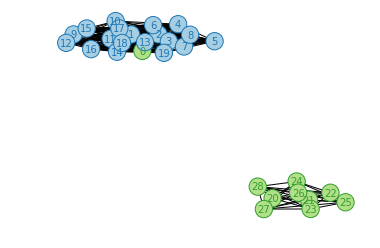

In [73]:
G = nx.read_pajek('/home/damian/inca/comparisons/INCA_softcosine_nu_nu_2019_3_27_12_21_3.net')

Gint = nx.convert_node_labels_to_integers(G)

H = findCommunities(Gint)

drawNetwork(H)

In [23]:
nx.convert_node_labels_to_integers?

In [59]:
for e in G.edges(data=True):
    print(*e)

https://www.nu.nl/-/5560667/ https://www.nu.nl/-/5560667/ {'weight': 0.9999999999999999}
https://www.nu.nl/-/5560667/ https://www.nu.nl/-/5561273/ {'weight': 0.12015132635111647}
https://www.nu.nl/-/5560667/ https://www.nu.nl/-/5560703/ {'weight': 0.15593995487388965}
https://www.nu.nl/-/5560667/ https://www.nu.nl/-/5561195/ {'weight': 0.12053809065109217}
https://www.nu.nl/-/5560667/ https://www.nu.nl/-/5560652/ {'weight': 0.04111169546843276}
https://www.nu.nl/-/5560667/ https://www.nu.nl/-/5561264/ {'weight': 0.1170626595143655}
https://www.nu.nl/-/5560667/ https://www.nu.nl/-/5560634/ {'weight': 0.10539073239936667}
https://www.nu.nl/-/5560667/ https://www.nu.nl/-/5561156/ {'weight': 0.07043036324878452}
https://www.nu.nl/-/5560667/ https://www.nu.nl/-/5561225/ {'weight': 0.15938050221439218}
https://www.nu.nl/-/5560667/ https://www.nu.nl/-/5561174/ {'weight': 0.0685667986328149}
https://www.nu.nl/-/5560667/ https://www.nu.nl/-/5561168/ {'weight': 0.03654014769333394}
https://www.n

In [25]:
nx.read_pajek?

In [33]:
G_recoveredlabels = nx.relabel_nodes(Gint, dict(zip(Gint,G)))

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


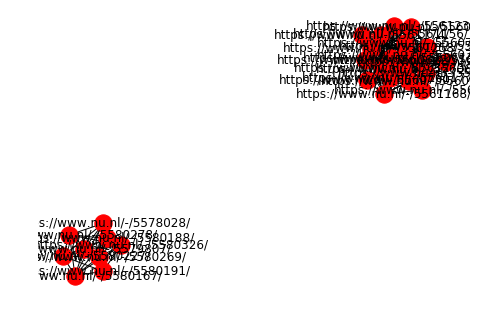

In [41]:
nx.draw(G, with_labels=True)

In [43]:
H_labeled = nx.relabel_nodes(H, dict(zip(H,G)))

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


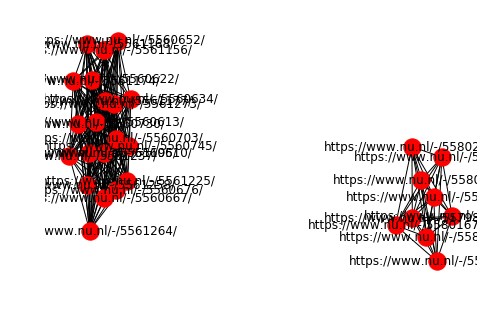

In [46]:
nx.draw(H_labeled, with_labels=True)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


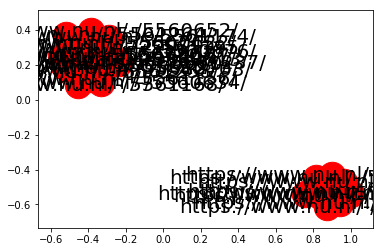

In [78]:

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.show()

In [72]:
G.edges(data=True)

EdgeDataView([('a', 'b', {'weight': 0.6}), ('a', 'c', {'weight': 0.2}), ('a', 'd', {'weight': 0.3}), ('c', 'd', {'weight': 0.1}), ('c', 'e', {'weight': 0.7}), ('c', 'f', {'weight': 0.9})])